## Generacion de Señales 
### Señal senoidal

In [150]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fft import fft, fftfreq, fftshift, ifft
from IPython.display import Audio

In [151]:
# Parámetros de la señal
fs = 44100  # Frecuencia de muestreo (Hz)
duration = 5.0  # Duración de la señal (segundos)
frequency = 1000  # Frecuencia de la señal (Hz)

In [152]:
# Generar la señal de onda senoidal
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * frequency * t)

In [153]:
# Reproducir la señal
sd.play(signal, fs)
print("Reproduciendo señal")
sd.wait()
print("Finalizado")

Reproduciendo señal
Finalizado


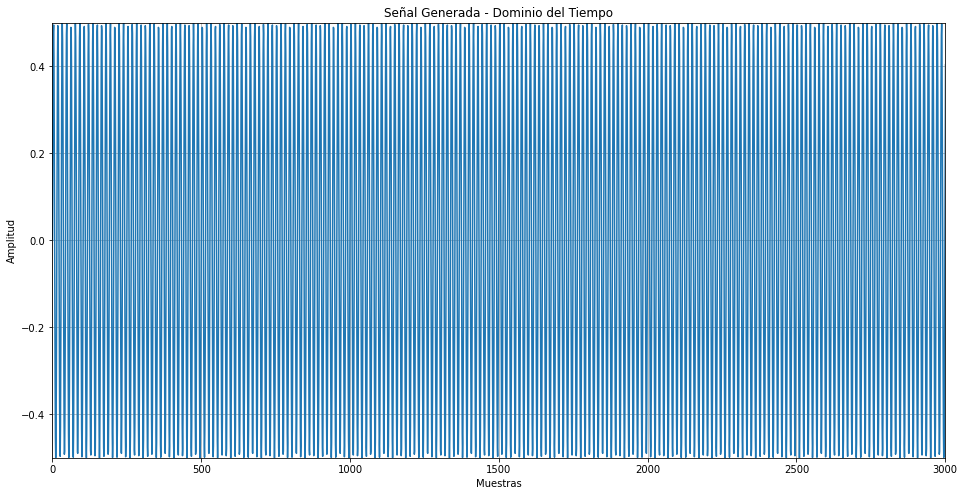

In [154]:
#Visualizacion de la señal generada en el dominio del Tiempo
plt.figure(figsize=(16, 8))
plt.plot(signal)
plt.title('Señal Generada - Dominio del Tiempo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.xlim(0, frequency)  
plt.ylim(min(signal), max(signal))  

plt.show()

In [155]:
# Cálculo del espectro de frecuencia
n = len(signal)
fs = 44100  # Frecuencia de muestreo (ajustar según tu caso)
freq = fftfreq(n, d=1/fs)
espectro = np.abs(fft(signal))

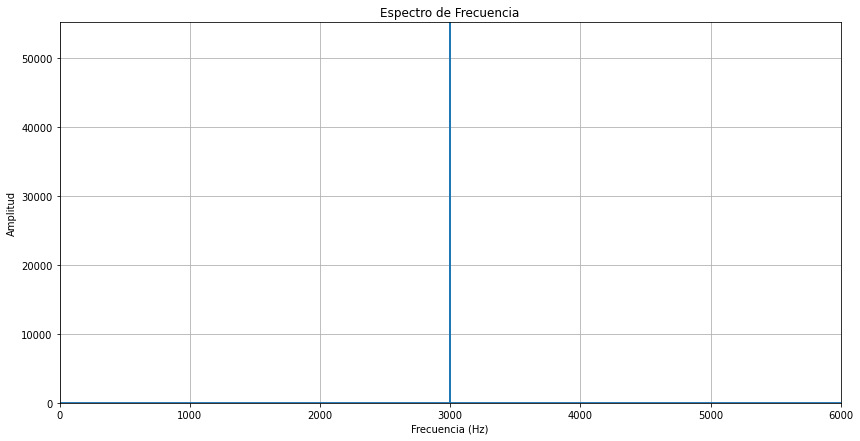

In [156]:
# Visualización en el dominio de la frecuencia
plt.figure(figsize=(14, 7))
plt.plot(freq[:n//2], espectro[:n//2])  # Solo graficamos hasta la mitad (frecuencias positivas)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.xlim(0, 2*frequency)  
plt.ylim(0, max(espectro)) 

plt.show()